## Aggregating conversations

#### From zip files

In [ ]:
import json
import glob
import zipfile
import pandas as pd

chat_folder = "/Users/piek/Desktop/t-MA-HLT-introduction-2024/lab-assignments/HLT-2024-lab0-submissions"
dir_list = os.listdir(chat_folder)
all_conversations = []
for file in glob.glob(chat_folder + '/*.zip'):
    with zipfile.ZipFile(file) as myzip:
        for filename in myzip.namelist():
            if filename.endswith('.json'):
                f = myzip.open(filename)
                try:
                    print(filename)
                    d = json.load(f)
                    all_conversations.extend(d)
                except:
                    print(filename)

#### From annotations

In [92]:
import json
import glob
import zipfile
import pandas as pd

chat_folder = "/Users/piek/Desktop/t-MA-HLT-introduction-2024/lab-assignments/HLT-2024-lab0-submissions/annotations"
dir_list = os.listdir(chat_folder)
all_conversations = []
for filename in glob.glob(chat_folder + '/*.json'):
    with open(filename) as f:
        try:
            d = json.load(f)
            all_conversations.extend(d)
        except:
            print(filename)

In [ ]:
#### From conversations

In [82]:
# import json
# import glob
# import zipfile
# import pandas as pd

# chat_folder = "/Users/piek/Desktop/t-MA-HLT-introduction-2024/lab-assignments/HLT-2024-lab0-submissions/conversations"
# dir_list = os.listdir(chat_folder)
# all_conversations = []
# for filename in glob.glob(chat_folder + '/*.json'):
#     with open(filename) as f:
#         try:
#             d = json.load(f)
#             all_conversations.extend(d)
#         except:
#             print(filename)

In [93]:
print('Total number of turns', len(all_conversations))

Total number of turns 742


In [94]:
all_file = "all_conversations.json"
with open(all_file,'w') as file:
    json.dump(all_conversations, file, indent = 4)

## Data statistics

In [95]:
from collections import Counter, OrderedDict
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_labels_with_counts(labels, values):
    total = 0
    for v in values:
        total+=v
    print('Total of values', total)
    ax = sns.barplot(x=labels, y=values)
    #rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
    # Add values above bars
    for i, v in enumerate(values):
        ax.text(i, v + 0.2, str(int((v/total*100)))+'%', ha='center')
    plt.show()

In [96]:
df = pd.read_json("all_conversations.json")
df.head()

,utterance,speaker,turn_id,Gold,Annotator
0,You act as a person and your name is Llama.,Llama,1,neutral,auto
1,Hello,Human,2,neutral,Aysha
2,"Hola! I'm Llama, nice to meet you! What brings...",Llama,3,neutral,auto
3,I'm in dire need of help!,Hello,4,fear,Aysha
4,"Oh no, what's wrong?! Don't worry, I'm here fo...",Llama,5,neutral,auto


Speaker values {'Charles', 'Sissy', 'Wilbur', "Hi, I'm Lalamama.", 'Leon', 'Artemidorus', 'Coins', 'Olaf', 'Big Head', "Hi Llama, I'm Bob, please talk to me, I'm not feeling well, I was divorced recently. Please be brief.", "Hey, I'm Lolamama.", 'Hello! My name is Alice.', 'Human', 'Igor', 'Carol', 'Coco', 'Bassie', 'Jake', 'Kristof', 'Hello', 'Amber'}

OrderedDict([('Amber', 20), ('Artemidorus', 12), ('Bassie', 13), ('Big Head', 21), ('Carol', 18), ('Charles', 16), ('Coco', 20), ('Coins', 10), ('Hello', 19), ('Hello! My name is Alice.', 20), ("Hey, I'm Lolamama.", 25), ("Hi Llama, I'm Bob, please talk to me, I'm not feeling well, I was divorced recently. Please be brief.", 21), ("Hi, I'm Lalamama.", 1), ('Human', 18), ('Igor', 20), ('Jake', 19), ('Kristof', 13), ('Leon', 25), ('Olaf', 19), ('Sissy', 20), ('Wilbur', 21)])
Total of values 371


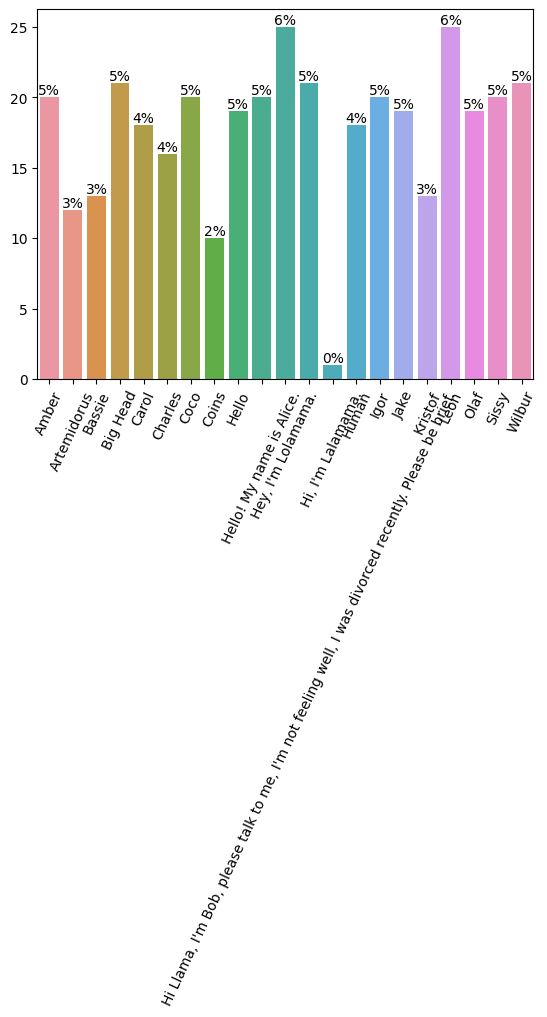

In [97]:
speakers = []
for s in df['speaker']:
    if not s=='Llama':
        speakers.append(s)
print('Speaker values', set(speakers))
print()
counts = Counter(speakers)
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
plot_labels_with_counts(labels, values)

Annotator values {'Jinsheng Zhao', 'Yuleum', 'Elisabetta', 'Aidona Katsanaki Menares', 'Wilbur', 'Cheryl', 'Urtė', 'Martha', 'Victoria', 'Shenglin Li', 'Yunchong Huang', 'Aysha', 'Wayne', 'Melina Paxinou', 'Manya', 'Maja', 'Amélie', 'Ino', 'Sanne'}

OrderedDict([('Aidona Katsanaki Menares', 22), ('Amélie', 21), ('Aysha', 20), ('Cheryl', 21), ('Elisabetta', 20), ('Ino', 14), ('Jinsheng Zhao', 21), ('Maja', 20), ('Manya', 26), ('Martha', 19), ('Melina Paxinou', 21), ('Sanne', 14), ('Shenglin Li', 22), ('Urtė', 13), ('Victoria', 21), ('Wayne', 17), ('Wilbur', 22), ('Yuleum', 11), ('Yunchong Huang', 26)])
Total of values 371


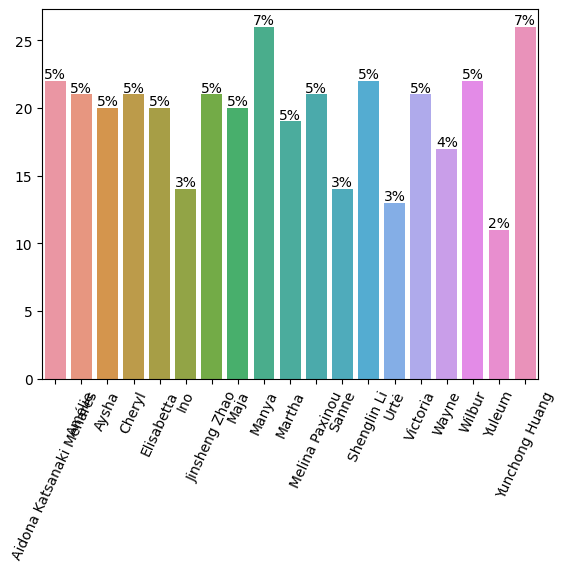

In [98]:
annotators = []
for s in df['Annotator'].dropna():
    if not s=='auto':
        annotators.append(s)
print('Annotator values', set(annotators))
print()
counts = Counter(annotators)
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
plot_labels_with_counts(labels, values)

Emotion values {'disgust', 'anger', 'surprise', 'neutral', 'fear', 'joy', 'sadness'}

OrderedDict([('anger', 57), ('disgust', 18), ('fear', 52), ('joy', 63), ('neutral', 106), ('sadness', 45), ('surprise', 30)])
Total of values 371


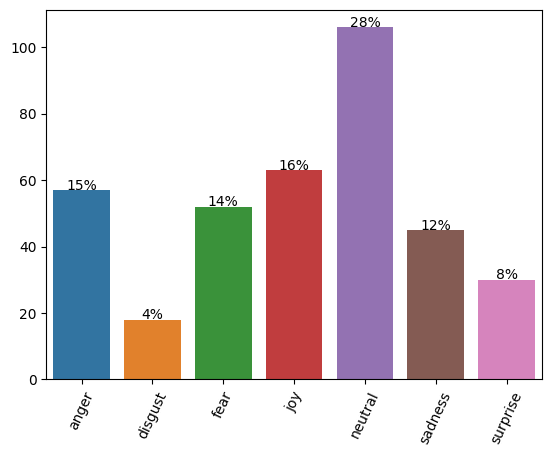

In [99]:
talks = {}
emotions = []
for ind in df.index:
    emotion = df['Gold'][ind]
    annotator = df['Annotator'][ind]
    speaker = df['speaker'][ind]
    if not annotator=='auto' and not str(emotion)=='nan':
        emotions.append(emotion)
    if speaker in talks:
        talks[speaker].append(str(annotator)+"-"+str(emotion))
    else:
        talks[speaker]=[str(annotator)+"-"+str(emotion)]

print('Emotion values', set(emotions))
print()
counts = Counter(emotions)
counts_sorted = OrderedDict(sorted(counts.items()))
print(counts_sorted)
labels = list(counts_sorted.keys())
values = list(counts_sorted.values())
plot_labels_with_counts(labels, values)

In [100]:
speakerCounts = {}
for speaker in talks.keys():
    values = talks[speaker]
    counts = Counter(values)
    speakerCounts[speaker] = counts

for item in speakerCounts.keys():
    print(item, speakerCounts[item])

Llama Counter({'auto-neutral': 371})
Human Counter({'Aysha-neutral': 1, 'Manya-neutral': 1, 'Victoria-neutral': 1, 'Yuleum-neutral': 1, 'Cheryl-neutral': 1, 'Jinsheng Zhao-neutral': 1, 'Ino-neutral': 1, 'Wayne-neutral': 1, 'Wilbur-neutral': 1, 'Maja-neutral': 1, 'Melina Paxinou-neutral': 1, 'Martha-neutral': 1, 'Shenglin Li-neutral': 1, 'Urtė-neutral': 1, 'Elisabetta-neutral': 1, 'Aidona Katsanaki Menares-sadness': 1, 'Sanne-neutral': 1, 'Amélie-neutral': 1})
Hello Counter({'Aysha-joy': 5, 'Aysha-neutral': 5, 'Aysha-fear': 3, 'Aysha-sadness': 2, 'Aysha-anger': 2, 'Aysha-disgust': 1, 'Aysha-surprise': 1})
Leon Counter({'Manya-neutral': 8, 'Manya-joy': 7, 'Manya-surprise': 4, 'Manya-fear': 2, 'Manya-anger': 2, 'Manya-sadness': 1, 'Manya-disgust': 1})
Hello! My name is Alice. Counter({'Victoria-fear': 5, 'Victoria-anger': 5, 'Victoria-joy': 3, 'Victoria-sadness': 3, 'Victoria-neutral': 2, 'Victoria-disgust': 1, 'Victoria-surprise': 1})
Coins Counter({'Yuleum-neutral': 6, 'Yuleum-anger': 2

## End of notebook